<h2>Rescaling the Feature</h2>
<div style="font-size:18px;font-family:Calibri">
In the world of machine learning, where algorithms learn to find patterns and make decisions, feature scaling stands as the great equalizer, ensuring that every feature, regardless of its original scale, has a voice that is heard equally loud in the chorus of data.
</div>

In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings("ignore")

In [13]:
feature = np.array([
    [-500.5],
    [-24.9],
    [0],
    [1500],
    [860],
    [100.9],
    [-900]
])
minmax = preprocessing.MinMaxScaler(feature_range = (0, 1))
scaled_feature = minmax.fit_transform(feature)
scaled_feature

array([[0.16645833],
       [0.364625  ],
       [0.375     ],
       [1.        ],
       [0.73333333],
       [0.41704167],
       [0.        ]])

In [17]:
using_formula = (feature - feature.min())/(feature.max() - feature.min())
using_formula

array([[0.16645833],
       [0.364625  ],
       [0.375     ],
       [1.        ],
       [0.73333333],
       [0.41704167],
       [0.        ]])

<h2>Standardizing the Feature</h2>
<div style="font-size:18px;font-family:Calibri">
    You want to transform the feature to have a mean of 0 and a standard deviation of 1. The transformed feature represents the no. of standard deviations the orignal value is away from the features mean value, also known as $Z-Score$ in Statistics.
</div>

In [22]:
standard_scaler = preprocessing.StandardScaler()
standardized = standard_scaler.fit_transform(feature)
standardized

array([[-0.86785943],
       [-0.23131446],
       [-0.1979882 ],
       [ 1.80961788],
       [ 0.95303929],
       [-0.06294323],
       [-1.40255185]])

In [27]:
# Using formula
(feature - feature.mean())/feature.std()

array([[-0.86785943],
       [-0.23131446],
       [-0.1979882 ],
       [ 1.80961788],
       [ 0.95303929],
       [-0.06294323],
       [-1.40255185]])

In [35]:
print("Mean of Scaled Feature", standardized.mean().round(0))
print("Standard Deviation of Scaled Feature", standardized.std().round(0))

Mean of Scaled Feature 0.0
Standard Deviation of Scaled Feature 1.0


<div style="font-size:18px;font-family:Calibri">
    If our data has significant outliers, it can negatively impact standardization by affecting the feature's mean and variance. In such scenarios, it is often helpful to rescale the features using median and quartile range. We do this using $Robust Scaler$ method.
</div>

In [38]:
robust_scaler = preprocessing.RobustScaler()
robust_scaler.fit_transform(feature)

array([[-0.67348449],
       [-0.03350602],
       [ 0.        ],
       [ 2.01843504],
       [ 1.15723609],
       [ 0.1357734 ],
       [-1.21106102]])

<h2>Evaluating the Impact of Feature Scaling on Machine Learning Model</h2>

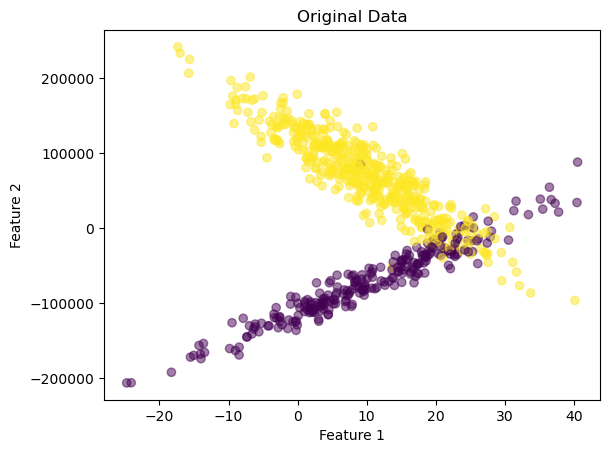

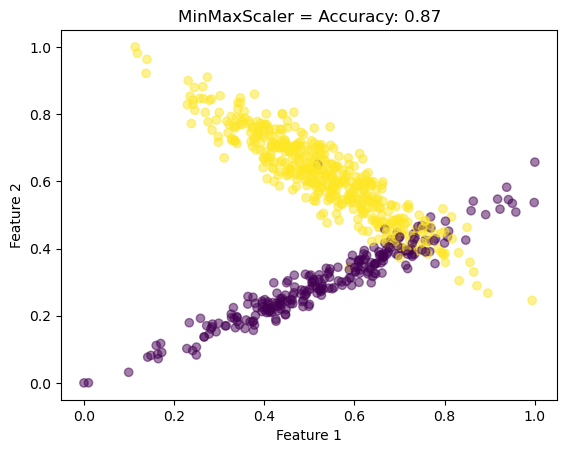

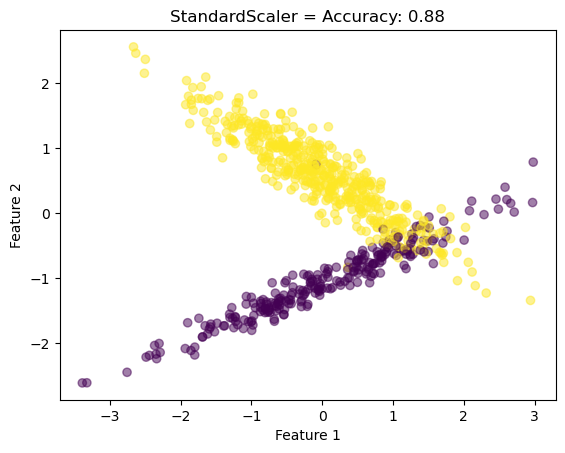

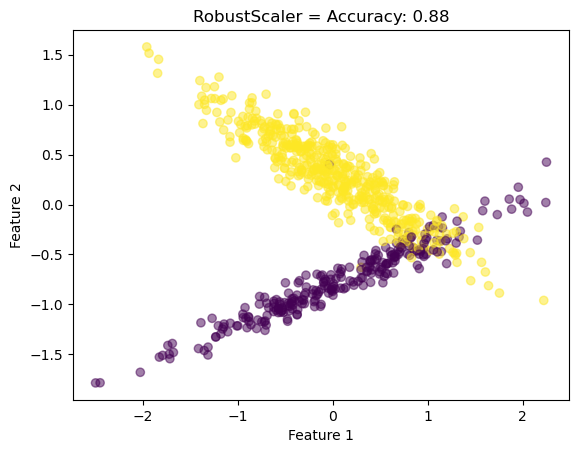

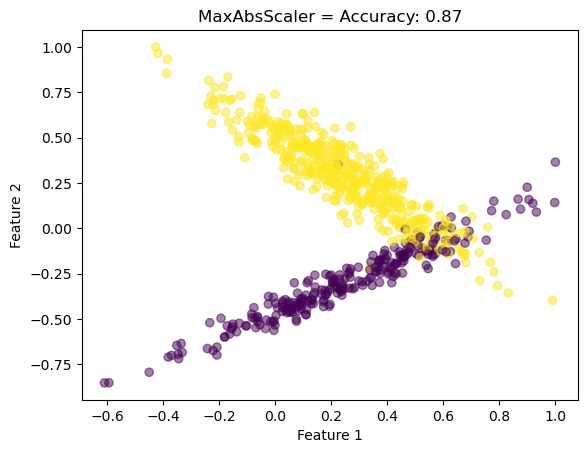

In [105]:
X, y = make_classification(
    n_samples = 1000,
    n_features = 2,
    n_redundant = 0,
    n_clusters_per_class = 1,
    weights = [0.35, 0.65],
    random_state = 42
)
X[:, 0] = (X[:, 0] * 10)
X[:, 1] = (X[:, 1] * 72232)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

def apply_scaling_and_evaluate(scaler):
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = LogisticRegression(random_state = 42)
    model.fit(X_train_scaled, Y_train)
    prediction = model.predict(X_test_scaled)
    accuracy = accuracy_score(Y_test, prediction)

    plt.scatter(X_train_scaled[:,0], X_train_scaled[:, 1], c = Y_train, cmap = 'viridis', alpha = 0.5)
    plt.title(f"{scaler.__class__.__name__} = Accuracy: {accuracy:.2f}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plt.scatter(X_train[:,0], X_train[:, 1], c = Y_train, cmap = 'viridis', alpha = 0.5)
plt.title(f"Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

scalers = [preprocessing.MinMaxScaler(), preprocessing.StandardScaler(), preprocessing.RobustScaler(), preprocessing.MaxAbsScaler()]

for scaler in scalers:
    apply_scaling_and_evaluate(scaler)

<h2> Normalizing the Observations</h2>

In [125]:
features = np.array([
    [0.5, 0.54],
    [1.34, 0.99],
    [8, 4],
    [12, 6.666],
    [1.4, 67.8]
])
normalizer = preprocessing.Normalizer(norm = "l1")
normalizer.fit_transform(features)

array([[0.48076923, 0.51923077],
       [0.5751073 , 0.4248927 ],
       [0.66666667, 0.33333333],
       [0.6428801 , 0.3571199 ],
       [0.02023121, 0.97976879]])

<h2>Generating Polynomial & Interaction Features</h2>
<div style="font-size:18px;font-family:Calibri">
    Polynomial Features are often created when we want to include the notion that there exists a non-linear relationship between the feature and target.
</div>

In [140]:
features = np.array([
    [2, 3, 4],
    [5, 6, 7],
    [3, 4, 5]
])

polynomial_interaction = preprocessing.PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)
polynomial_interaction.fit_transform(features)
# Restrict the features created only to interaction features.

array([[ 2.,  3.,  4.,  6.,  8., 12.],
       [ 5.,  6.,  7., 30., 35., 42.],
       [ 3.,  4.,  5., 12., 15., 20.]])

<h2>Transforming The Features</h2>

In [148]:
def add_ten(x : int) -> int:
    return x + 10

ten_transformer = preprocessing.FunctionTransformer(add_ten)
ten_transformer.fit_transform(features)

array([[12, 13, 14],
       [15, 16, 17],
       [13, 14, 15]])

In [152]:
# We can do the same transformation in pandas using apply() method.
df = pd.DataFrame(features, columns = ["feature 1", "feature 2", "feature 3"])
df.apply(lambda x : x + 10)

,feature 1,feature 2,feature 3
0,12,13,14
1,15,16,17
2,13,14,15


<h2>Detecting Outliers</h2>

In [202]:
features, _ = make_blobs(
    n_samples = 10,
    n_features = 2,
    centers = 1,
    random_state = 1
)
# Introducing the Outliers
features[0,0] = 826338
features[0,1] = 242338
features[4,0] = 110638
features[4,1] = 291138

features

array([[ 8.26338000e+05,  2.42338000e+05],
       [-2.76017908e+00,  5.55121358e+00],
       [-1.61734616e+00,  4.98930508e+00],
       [-5.25790464e-01,  3.30659860e+00],
       [ 1.10638000e+05,  2.91138000e+05],
       [-7.94152277e-01,  2.10495117e+00],
       [-1.34052081e+00,  4.15711949e+00],
       [-1.98197711e+00,  4.02243551e+00],
       [-2.18773166e+00,  3.33352125e+00],
       [-1.97451969e-01,  2.34634916e+00]])

In [207]:
outlier_detect = EllipticEnvelope(contamination = .2)
outlier_detect.fit(features)
outlier_detect.predict(features)

array([-1,  1,  1,  1, -1,  1,  1,  1,  1,  1])

<div style="font-size:18px;font-family:Calibri">
    Instead of looking at the observations as a whole we can look at the individual features and identify extreme values in those features using Interquartile range (IQR).
</div>

In [210]:
def indices_of_outliers(x : int) -> np.array(int):
    q1, q3 = np.percentile(features, [25, 75])
    iqr = q3-q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound))

indices_of_outliers(features)

(array([0, 0, 4, 4], dtype=int64), array([0, 1, 0, 1], dtype=int64))

<h2>Handling the Outliers</h2>

In [213]:
houses = pd.DataFrame()
houses["Price"] = [12345, 56343, 99127, 1278232, 32764, 13112]
houses["Rooms"] = [3, 4, 2, 100, 5, 1]
houses["Square_ft"] = [900, 1500, 1800, 18000, 1200, 1000]

In [217]:
houses[houses["Rooms"] < 20]

,Price,Rooms,Square_ft
0,12345,3,900
1,56343,4,1500
2,99127,2,1800
4,32764,5,1200
5,13112,1,1000


In [221]:
houses["Outliers"] = np.where(houses["Rooms"] < 20, 0, 1)
houses

,Price,Rooms,Square_ft,Outliers
0,12345,3,900,0
1,56343,4,1500,0
2,99127,2,1800,0
3,1278232,100,18000,1
4,32764,5,1200,0
5,13112,1,1000,0


In [225]:
# Transform the feature to dampen the effect of outlier
houses["Log_of_sqft"] = [np.log(x) for x in houses["Square_ft"]]
houses

,Price,Rooms,Square_ft,Outliers,Log_of_sqft
0,12345,3,900,0,6.802395
1,56343,4,1500,0,7.313220
2,99127,2,1800,0,7.495542
3,1278232,100,18000,1,9.798127
4,32764,5,1200,0,7.090077
5,13112,1,1000,0,6.907755


<div style="font-size:18px;font-family:Calibri">
    There is no hard-and-fast rule for handling outliers. How we handle them should be based on 2 aspects. <br> 
    <ul>
        <li>First, consider what makes them an outlier. If we believe they are the errors in the data like broken sensor or miscoded value, then we might drop the observation or replace the outliers with NaN.</li>
        <li>
            Secondly, how we handle the outlier should be based on the goal of the Machine Learning.
        </li>
    </ul>
</div>

<h2>Discretizating Features</h2>

In [243]:
# Binarize the feature according to some threshold
x = np.array([[60], [12], [20], [6], [50], [5], [45]])
binarizer = preprocessing.Binarizer(threshold = 18)
binarizer.fit_transform(x)

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1]])

In [249]:
# Break up the features according to the multiple thresholds
np.digitize(x, bins = [20, 30, 55, 64])

array([[3],
       [0],
       [1],
       [0],
       [2],
       [0],
       [2]], dtype=int64)

<h2>Grouping the Observations using Clustering</h2>

In [260]:
features, _ = make_blobs(n_samples = 50,
                     n_features = 2,
                     centers = 3,
                     random_state = 1)
df = pd.DataFrame(features, columns = ["feature 1", "feature 2"])
clusterer = KMeans(3, random_state = 0)
clusterer.fit(features)

KMeans(n_clusters=3, random_state=0)

In [266]:
df["group"] = clusterer.predict(features)
df.head()

,feature 1,feature 2,group
0,-9.877554,-3.336145,2
1,-7.287210,-8.353986,0
2,-6.943061,-7.023744,0
3,-7.440167,-8.791959,0
4,-6.641388,-8.075888,0


<h2>Deleting the Observations with the Missing Values</h2>

In [275]:
features = np.array([[1.1, 11.1],
                    [2.2, 22.2],
                    [3.4, np.nan],
                    [98, 32],
                    [np.nan, 21],
                    [np.nan, np.nan]])

In [283]:
features[~np.isnan(features).any(axis=1)]

array([[ 1.1, 11.1],
       [ 2.2, 22.2],
       [98. , 32. ]])

In [285]:
df = pd.DataFrame(features, columns = ["feature1", "feature2"])

df.dropna()

,feature1,feature2
0,1.1,11.1
1,2.2,22.2
3,98.0,32.0


<h2>Imputing The Missing values</h2>

In [312]:
features, _ = make_blobs(n_samples = 10000,
                        n_features = 2, random_state = 1)
scaler = preprocessing.StandardScaler()
standardized = scaler.fit_transform(features)
true_value = standardized[0,0]
standardized[0,0] = np.nan

In [314]:
knn_imputer = KNNImputer(n_neighbors = 5)
features_knn_imputed = knn_imputer.fit_transform(standardized)
print("True Value: ", true_value)
print("Imputed Value: ", features_knn_imputed[0,0])

True Value:  0.8713831287970171
Imputed Value:  1.3255793029777627


<h2>End of Day 4 :|:</h2>